### Домашнее задание

Проведите вычислительные эксперимент - для заданной функции Растригина найдите среднее и минимальное 
значение целевой функции по результатам 100 экспериментов, а также среднее число итераций при случайных 
начальных условиях в диапазон [-5;5]. Эксперимент выполнить для размерностей d = 2 и 4.

Определение функции:

f(x) = An + E[x^2 - A cos(2*pi*x)]

где A = 10 и x E[-5.12, 5.12]. Глобальный минимум в точке x = 0, где f(x) = 0

Результаты представьте в виде сводной таблицы:

In [1]:
from sympy import symbols
import scipy

In [2]:
from scipy.optimize import minimize

In [3]:
x = symbols('x')
# pi = symbols('pi')
A = 10



In [4]:
import numpy as np


def rastrigin(X):
    return A + sum([(x**2 - A * np.cos(2 * scipy.pi * x)) for x in X])

In [5]:
itList_2=[]
resList_2=[]

for kk in range(100):
    x0=np.random.uniform(low=-5,high=5,size=(2,))
    res = minimize(rastrigin, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp':False})
    
    itList_2.append(res.nit)
    resList_2.append(rastrigin(res.x))

In [6]:
np.mean(resList_2)

7.262434282577332

In [7]:
np.max(resList_2)

30.792966727003765

In [8]:
np.min(resList_2)

-10.0

In [9]:
np.mean(itList_2)

62.84

In [19]:
itList_4=[]
resList_4=[]

for kk in range(100):
    x0=np.random.uniform(low=-5,high=5,size=(4,))
    res = minimize(rastrigin, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp':False})
    
    itList_4.append(res.nit)
    resList_4.append(rastrigin(res.x))

In [20]:
np.mean(resList_4)

4.554698946661223

In [21]:
np.max(resList_4)

53.57577004511369

In [22]:
np.min(resList_4)

-27.015122828720088

In [23]:
np.mean(itList_4)

184.16

In [24]:
import pandas as pd

In [25]:
rows_ = ['Среднее значение целевой функции', 
         'Минимальное найденное значение целевой функции',
        'Среднее число итераций']
cols_ = ['d=2',
        'd=4']

In [26]:
df = pd.DataFrame([[np.mean(resList_2), np.mean(resList_4)], 
                   [np.min(resList_2), np.min(resList_4)], 
                   [np.mean(itList_2), np.mean(itList_4)]], rows_, cols_)
df

,d=2,d=4
Среднее значение целевой функции,7.262434,4.554699
Минимальное найденное значение целевой функции,-10.000000,-27.015123
Среднее число итераций,62.840000,184.160000


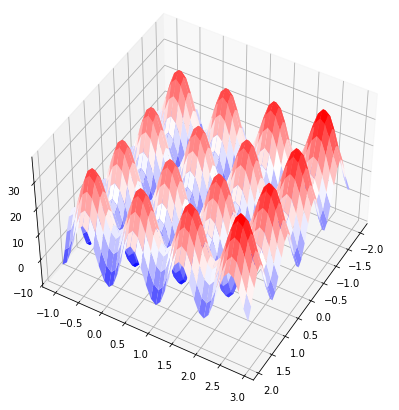

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=[10, 7])
ax = fig.gca(projection='3d')
ax.view_init(45, 30)

X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rastrigin(np.array([X, Y]))

surf = ax.plot_surface(X, Y, Z, cmap='bwr')
plt.show()